In [1]:
import numpy as np
import seaborn as sns
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib notebook
sns.set()

# Market rate for carrots and potatoes

In [23]:
ratio_widget = widgets.FloatLogSlider(value=1, base=2, min=-5, max=5, step=1)

<IPython.core.display.Javascript object>


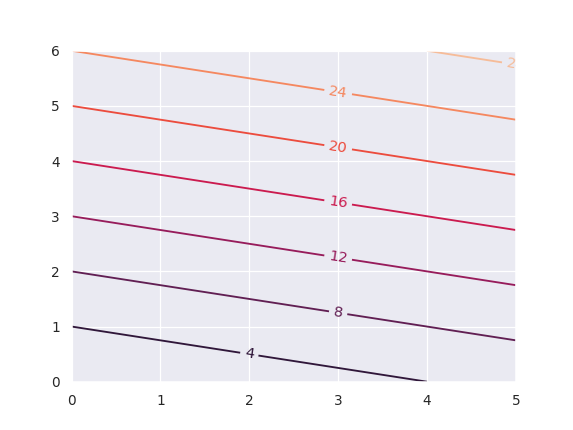

interactive(children=(FloatLogSlider(value=4.0, base=2.0, description='ratio', max=5.0, min=-5.0, step=1.0), O…

<function __main__.plot_market_landscape(ratio)>

In [36]:
fig = plt.figure()

def price(ratio, potato, carrot):
    potato_price = 1  # €/potato
    carrot_price = potato_price*ratio
    return potato*potato_price + carrot*carrot_price

def plot_market_landscape(ratio):
    plt.clf()
    X,Y = np.meshgrid(np.arange(0, 6), np.arange(0, 7))
    Z = price(ratio, X, Y)
    cs = plt.contour(X, Y, Z)
    plt.clabel(cs)
    fig.show()


widgets.interact(plot_market_landscape, ratio=ratio_widget)

<IPython.core.display.Javascript object>


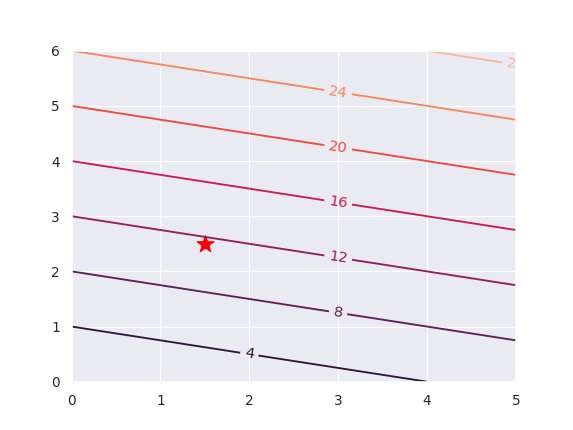

interactive(children=(FloatLogSlider(value=4.0, base=2.0, description='ratio', max=5.0, min=-5.0, step=1.0), F…

<function __main__.alice(ratio, potato, carrot)>

In [37]:
fig = plt.figure()
class State:
    pass
STATE = State()
STATE.ratio = None
def alice(ratio, potato, carrot):
    global STATE
    if ratio != STATE.ratio:
        STATE.ratio = ratio
        STATE.best_carrot = None
        STATE.best_potato = None
        STATE.best_price = -float('inf')    
    plot_market_landscape(ratio)
    if potato/3. + carrot/5. <= 1:
        if (current_price := price(ratio, potato, carrot)) > STATE.best_price:
            STATE.best_price = current_price
            STATE.best_potato = potato
            STATE.best_carrot = carrot
        plt.scatter(potato, carrot, color="blue")
        plt.scatter(STATE.best_potato, STATE.best_carrot, color="red", marker="*", s=200)
        return price(ratio, potato, carrot)
    return "Alice can't produce that much"

widgets.interact(alice, ratio=ratio_widget, potato=(0., 3.), carrot=(0., 5.))

<IPython.core.display.Javascript object>


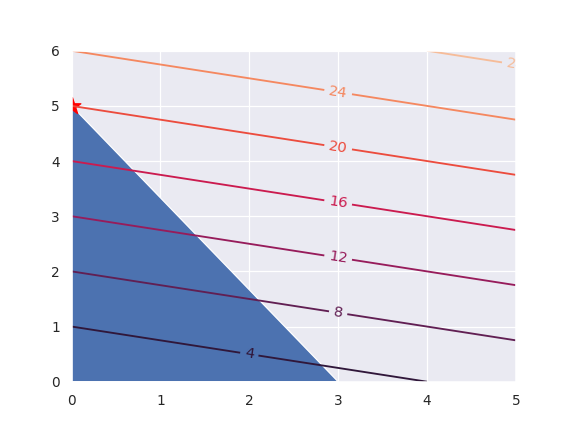

interactive(children=(FloatLogSlider(value=4.0, base=2.0, description='ratio', max=5.0, min=-5.0, step=1.0), O…

<function __main__.alice_feasible_zone(ratio)>

In [38]:
fig = plt.figure()
def alice_feasible_zone(ratio):
    carrot_0 = 5
    potato_0 = 0
    carrot_1 = 0
    potato_1 = 3
    plot_market_landscape(ratio)
    plt.fill([0,potato_0, potato_1], [0, carrot_0, carrot_1])
    if price(ratio, potato_0, carrot_0) > price(ratio, potato_1, carrot_1):
        plt.scatter(potato_0, carrot_0, color="red", marker="*", s=200)
    else:
        plt.scatter(potato_1, carrot_1, color="red", marker="*", s=200)

    

widgets.interact(alice_feasible_zone, ratio=ratio_widget)

<IPython.core.display.Javascript object>


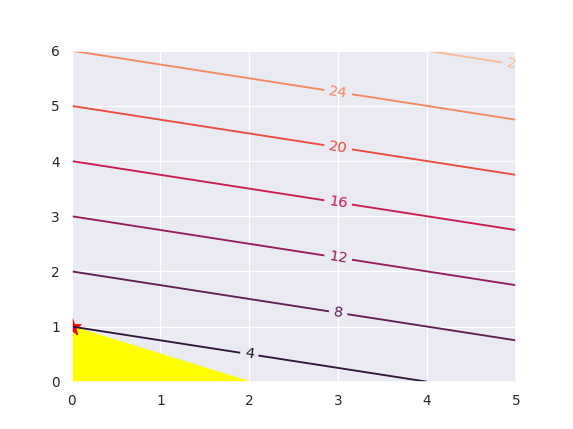

interactive(children=(FloatLogSlider(value=4.0, base=2.0, description='ratio', max=5.0, min=-5.0, step=1.0), O…

<function __main__.bob_feasible_zone(ratio)>

In [39]:
fig = plt.figure()
def bob_feasible_zone(ratio):
    carrot_0 = 1
    potato_0 = 0
    carrot_1 = 0
    potato_1 = 2
    plot_market_landscape(ratio)
    plt.fill([0,potato_0, potato_1], [0, carrot_0, carrot_1], color="yellow")
    if price(ratio, potato_0, carrot_0) > price(ratio, potato_1, carrot_1):
        plt.scatter(potato_0, carrot_0, color="red", marker="*", s=200)
    else:
        plt.scatter(potato_1, carrot_1, color="red", marker="*", s=200)

    

widgets.interact(bob_feasible_zone, ratio=ratio_widget)